<a href="https://colab.research.google.com/github/promptmule4real/demo/blob/main/promptmule_api_key_gen_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Introduction to the PromptMule Quickstart Demo v0.5.5

> tl;dr: If you are an expert at Google Colab, python, OpenAI (or any of these really) just jump to the code.

Welcome to our interactive demo. This guide will walk you through the process of generating your own API Key, empowering you to harness the capabilities of PromptMule. As a cloud-based cache for generative AI applications, PromptMule provides a platform for swift data retrieval and storage, enhancing the overall performance and efficiency of your AI development workflows. This demo is tailor-made for a Google Colaboratory runtime environment, offering an exciting journey into the dispatch of prompts via OpenAI and the testing of cache functionalities.


If you're viewing this on GitHub (https://github.com/), click the "Open in Colab" button, located in the upper left corner of the GitHub Preview page. This will open the Google Colab notebook in a fresh tab, allowing you to run, modify, and engage with the demo code in real-time.

Once you've launched the notebook in Google Colab, simply follow the step-by-step instructions outlined below to generate your unique PromptMule API Key and Token.

Please keep in mind that a more comprehensive demonstration of the PromptMule capabilities is on the horizon in our forthcoming demo, which we will be launching after our next development sprint!

We warmly invite you to dive into this interactive experience and welcome any feedback or questions. Feel free to reach out to us at www.promptmule.com.

**Key Highlights:**
1. **Getting Started:** Open the demo on Google Colab from the GitHub preview page.
2. **API Key Generation:** Detailed, step-by-step instructions for generating a unique PromptMule API Key & Token.
3. **Registration:** Set up the registration API call with headers and user details (username, password, email). A verification email will be sent to confirm.
4. **Token Generation:** Post-email verification, users can log in and generate an API Token.
5. **API Key Usage:** Instructions on incorporating the generated API token for creating an API key.
6. **Prompt & Response Calls:** Demonstrates how to use the generated Token and API key to interact with OpenAI's gpt-3.5-turbo model via chat completion endpoint.
7. **Cache Interaction:** Showcases cache hit scenarios, how to make calls via PromptMule, and the role of various parameters like 'semantic' and 'sem_num'.
8. **Understanding Return Values:** Explanation of key response elements such as 'search_score', 'saved_cost', 'exact_match', and more.
9. **Deleting a User:** Guide on how users can delete their PromptMule username using the DELETE endpoint.

**Additional Information:**
- Comprehensive demonstration of PromptMule's capabilities coming soon.
- Feedback and inquiries can be made at www.promptmule.com.
- For detailed structuring on OpenAI Request Body Key:Value pairs, users can refer to the official documentation.

**Target Audience:** Ideal for developers familiar with Google Colab, python, and OpenAI. However, the demo caters to all levels of expertise.

**Feedback and Collaboration:** We welcome feedback, questions, and contributions from the developer community. Reach out to info@promptmule.com.

---

If you're currently in Google Colab (https://colab.research.google.com/): To get started, just click on the "Run Cell" button found to the left of the code block. This button is akin to the play button you might recognize from a DVD player. Upon activation, you're encouraged to probe, tinker with, and learn from the code at your own pace.

---
## 0. Let's Begin

Below we will set up the python environment by importing some basics, so that we can send data using requests, read json and format nicely. That's it, pretty simple.

In [ ]:
import os
import requests
import json
import textwrap

In [ ]:
# This sets up the endpoints so that we can call them as needed, it makes the code a little more readable too.
ENDPOINT = 'https://820czjhki0.execute-api.us-west-2.amazonaws.com/dev/'
REGISTRATION = 'dev-signup'   # registration endpoint for a developer
LOGIN = 'login'               # login endpoint to get a Token
KEY_GEN = 'api-keys'          # API Key generation endpoint
PROMPT = 'prompt'             # The prompt endpoint, the working end of the cache
DELETE = 'delete'             # Delete your username endpoint, this is permanent, BE CAREFUL WITH THIS

---

To proceed, you'll need to personalize the following items with your own information: `username`, `password`, `email address` (make sure it's a valid one as we will be sending a verification email), and `application name`. This information will be used to register your account with PromptMule, allowing you to generate an API Key. This process is quite similar to the registration procedure with OpenAI, if you've done that before. It's straightforward and simple.

In [ ]:
# @title Get your Registration Data Setup here { display-mode: "both" }
#@markdown Below replace the capital LETTERS with your information inside of double quotes, pick a username, complex password, real email, and an application name that you will use as a reference in the future.

your_new_username = "demo10"  #@param {type: "string"}  # this is your username, it will need to be unique, else the API will tell you it's not and try again (str)
your_new_password = "Abcd@1234!"    #@param {type: "string"} # complex passwords are required (str)
your_real_email = "mrodgers@gmail.com" #@param {type: "string"} # must be a valid email as it is used in this process to validate (str)
your_new_appname = "reportingdemo1"    #@param {type: "string"}   # this is the application that you are using the promptmule API to build, this app name is unique (str)
#@markdown ---


# 1. Setting Up the Registration API call
Next we set up the headers and body of the of the registration API call, we will include your new username, password and real email to register you as a new user. Remeber, your email will get a verification email sent to it, so it must be legit.

In [ ]:
headers = {
    'Content-Type': 'application/json'
           }

data_raw = {
    "username": your_new_username,
    "password": your_new_password,
    "email": your_real_email
}

We update the endpoint of the API call to the Registration endpoint and send the API call.

In [ ]:
# this will set up the endpoint, and send the request to register
promptmule = ENDPOINT + REGISTRATION
registration = requests.request("POST", promptmule, headers=headers, json=data_raw)

In [ ]:
# This code will check the response, handle Registration API response
if registration.status_code == 200:
    print("Registration successful: ", json.dumps(json.loads(registration.text), indent=4))
else:
    print(f"Registration failed with status code {registration.status_code}:\n", json.dumps(json.loads(registration.text), indent=4))

---

## 2. Email Verification

Following the initial steps, you need to verify your email address. Check your inbox for a verification link sent from PromptMule (the email will be sent from no-reply@verificationemail.com CHECK YOUR SPAM FOLDER!). Simply click on the link to complete the verification process.

Failure to verify your email address will result in an error message similar to this when you attempt to login:

```json
{"message": "Error registering user", "error": "'email'"}
```

Upon successful verification, you'll be directed to a similar confirmation screen.



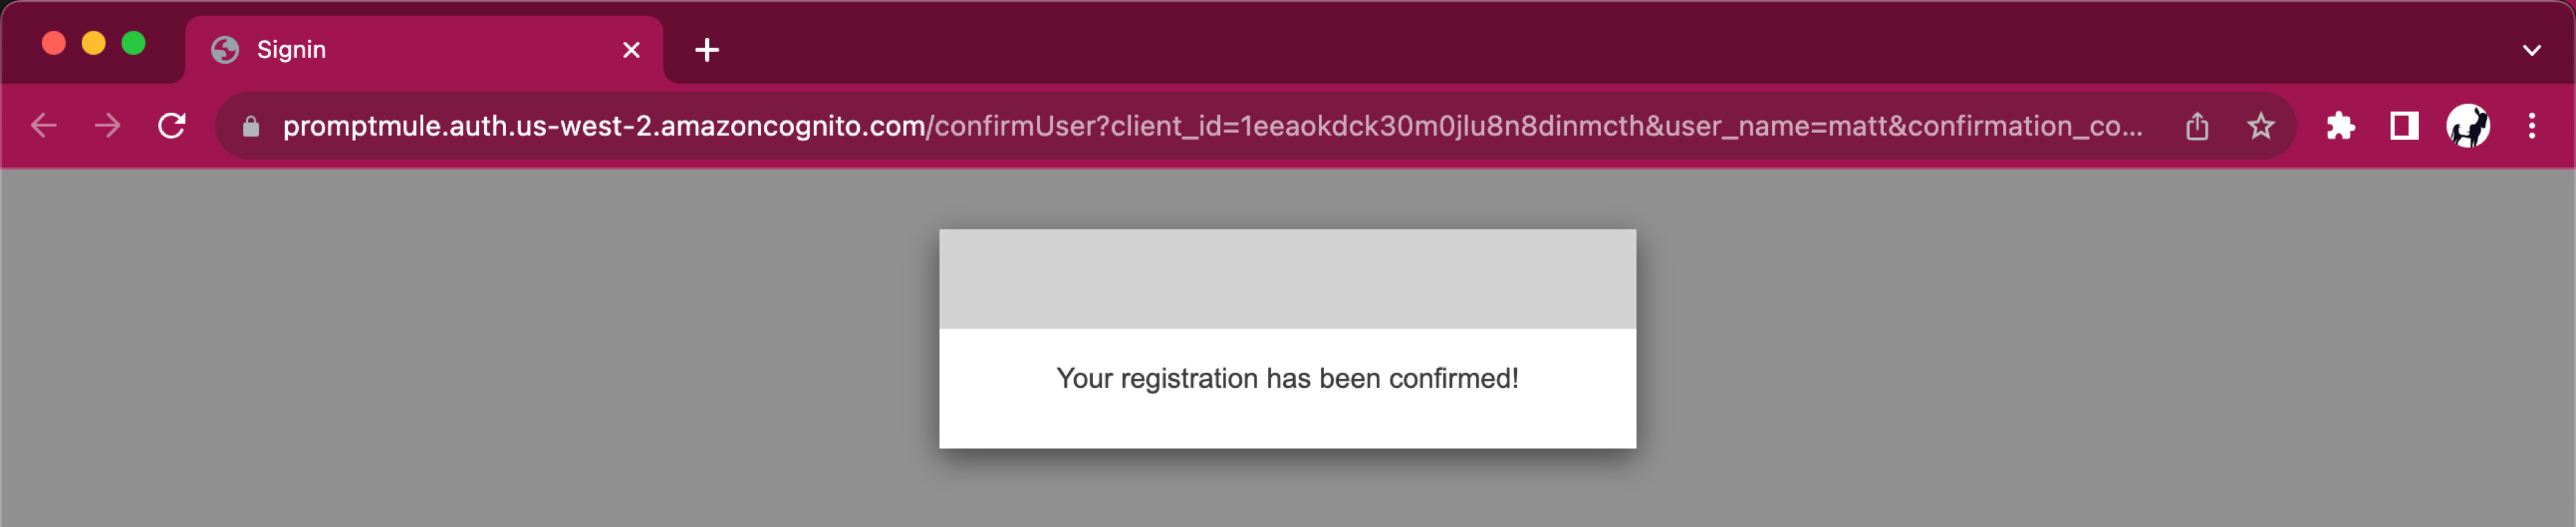

## 3. Token Generation

With verification complete, you can now proceed to login and generate your API Token.

The headers do not change for this API Call, so to Login we will not change them. We will change the body of the call, to only use your username and password.

In [ ]:
data_raw = {
    "username": your_new_username,
    "password": your_new_password
}

We update the endpoint to point at the Login endpoint and Send the API call.

In [ ]:
promptmule = ENDPOINT + LOGIN
login = requests.request("POST", promptmule, headers=headers, json=data_raw)

In [ ]:
# Evaluate response. In case of failure, it will be necessary to revisit the previous step and repeat the POST request.
if login.status_code == 200:
    print("Token generation succeeded:\n", json.dumps(json.loads(login.text), indent=4))
else:
    print(f"Login attempt unsuccessful. Token generation failed. Status code {login.status_code} received:\n", json.dumps(json.loads(login.text), indent=4))


Upon successful token generation, you'll receive a lengthy token string within the JSON response. If the token generation fails, an error message will be included in the response to guide you towards potential issues.

---
## 4. Obtaining your API Key

To proceed, incorporate the generated API token into your API header as follows: "Authentication: Bearer <Your-Token>". This token will serve as the credential for creating your API key.

In [ ]:
api_token = json.loads(login.text)['token']

The headers will be modified in order to use the Key Generation API. We will use an Authorization: Bearer <API_Token> which is the API token which you recieved in the earlier token generation step. We will also update the body of the API call to reflec the application name you chose.

In [ ]:
headers = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer ' + api_token
}

data_raw = {
  "app-name": your_new_appname
}

Next you will update the endpoint to the Key Generation endpoint and send the API call.

In [ ]:
# Set the endpoint up
promptmule = ENDPOINT + KEY_GEN
# send the API call to generate your PromptMule API Key
api_key_gen = requests.request("POST", promptmule, headers=headers, json=data_raw)
# Handle response from the API Call itself
if api_key_gen.status_code == 200:
    print("Token Generation successful:\n", json.dumps(json.loads(api_key_gen.text), indent=4))
else:
    print(f"Token generation failed with status code {api_key_gen.status_code}:\n", json.dumps(json.loads(api_key_gen.text), indent=4))

Great! If your API Key generation was successful. Your response should look something like this:

```json
{
    "success": true,
    "message": "Api key has been generated successfully",
    "app-name": "my_app_name",
    "api-key": "XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX"
}
```

## 5. Making your first LLM Prompt Calls

You can now utilize your newly generated Token and API key. These can be used to interact with OpenAI gpt-3.5-turbo model via the chat completion endpoint of OpenAI using our "Free Tier" account.

> *With our paid Tiers you can use other LLMs and other Models, check out www.promptmule.com for details.*

> For information on how to structure the OpenAI Request Body Key:Value pairs, refer to the official documentation here: https://platform.openai.com/docs/api-reference/chat/create



You can use the defaults, but you can also incorporated some unique parameters specific to `promptmule`:

- `api` (String): A required field, for this demonstration use "openai" which is the only supported API currently. default is (openai)

- `semantic` (Float): This required parameter specifies the "percentage match" of the sent prompt with existing prompts in the cache. If a match is found with a percentage equal to or higher than this value, a maximum number of matches (as defined by `sem_num`) will be returned in a JSON dictionary. default is 0.99

- `sem_num` (Integer): A required parameter which should be a number between 1 and 10. It represents the maximum number of semantic matches to be found in the cache and returned in the API response as a JSON dictionary. default is 2

In [ ]:
api_key = json.loads(api_key_gen.text)['api-key'] # set your API KEY into the api_key variable

We need to update the headers for the Prompt API call, per below with Authorization which is different than previous calls using your API Token, and x-api-key which is your PromptMule API-Key, and your OpenAI API-Key.

In [ ]:
headers = {           # this is the /prompt endpoint header
    'x-api-key': api_key,
    'Content-Type': 'application/json'
    }

api_call_body = {     # this is a /prompt call body example
    "model": "gpt-3.5-turbo-16k",  # using gpt-3.5-turbo, you must have access to this model, or the call will fail
    "messages": [
        {
            "role": "user",
            "content": "Create a Python function for the chances of seeing a unicorn in Central Park. Assume the probability is the square root of -1."
        }
    ],
    "max_tokens": "50",
    "temperature": "0.99",
    "user": your_new_username,
    "api": "openai",    # this is used to denote openai as the destination
    "semantic": "0.99", # this denotes the semantic match percentage in the cache
    "sem_num": "2"      # this denotes the number of matches to return if found
}

Note that we are pointing the endpoint at the Prompt endpoint this time, and then sending the API call.

In [ ]:
# set up the Prompt endpoint
promptmule = ENDPOINT + PROMPT
# send the prompt call itself
promptmule_response = requests.request("POST", promptmule, headers=headers, json=api_call_body)
# Handle response
if promptmule_response.status_code == 200:
    print("API Response successful:\n", json.dumps(json.loads(promptmule_response.text), indent=4))
else:
    print(f"API Response failed with status code {promptmule_response.status_code}:\n", json.dumps(json.loads(promptmule_response.text), indent=4))

The next step is just an example report of what might be done with the json object that is passed back with the PromptMule Prompt API response json. Feel free to play with it.

In [ ]:
# Parse the JSON data
parsed_data = json.loads(promptmule_response.text)

# Set up text wrapper
wrapper = textwrap.TextWrapper(width=80)

# Print header
print("--------------------------------------------------------")
print("                  PromptMule API Response")
print("--------------------------------------------------------")

# Print key-value pairs with text wrapping and indentation
for key, value in parsed_data.items():
    if isinstance(value, dict):
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            if isinstance(sub_value, dict):
                print(f"    {sub_key}:")
                for nested_key, nested_value in sub_value.items():
                    if nested_key == "content":
                        wrapped_value = "\n".join(wrapper.wrap(str(nested_value)))
                        print(f"        {nested_key}:\n{wrapped_value}")
                    else:
                        print(f"        {nested_key}: {nested_value}")
            else:
                print(f"    {sub_key}: {sub_value}")
    elif isinstance(value, list):
        print(f"{key}:")
        for item in value:
            print(f"    {{")
            for sub_key, sub_value in item.items():
                if isinstance(sub_value, dict):
                    print(f"        {sub_key}:")
                    for nested_key, nested_value in sub_value.items():
                        if nested_key == "content":
                            wrapped_value = "\n".join(wrapper.wrap(str(nested_value)))
                            print(f"            {nested_key}:\n{wrapped_value}")
                        else:
                            print(f"            {nested_key}: {nested_value}")
                else:
                    print(f"        {sub_key}: {sub_value}")
            print(f"    }}")
    else:
        wrapped_value = "\n".join(wrapper.wrap(str(value)))
        print(f"{key}: {wrapped_value}")

# Print footer
print("--------------------------------------------------------")
print("                 End of PromptMule API Response")
print("--------------------------------------------------------")

Make the OpenAI call via PromptMule the second time, this time it will have a cache hit. The purpose of this second call is to demonstrate a cache hit. Obviously, you could also just go back a few steps (specifically the one where we sent...promptmule_response = requests.request("POST", promptmule, headers=headers, json=api_call_body)) and you can resend that call and trigger cache hits. You can also change the prompt and see how novel prompts bypass the cache, or see how semantically similar prompts get sent back. Anyway, there are many ways to use this cache creatively, the sky is the limit. If you want to become a member of the Early Access Dev Team, be one of the first to share some code and your story. info@promptmule.com

In [ ]:
promptmule = ENDPOINT + PROMPT
promptmule_response = requests.request("POST", promptmule, headers=headers, json=api_call_body)

---

In the following section, we will examine key response elements including: `search_score`, `saved_cost`, and `exact_match`. These variables exhibit altered values when a cache hit, specifically a perfect match, is encountered.

## 6. Considering Return Values

- `search_score` (Integer): This represents the percentage match of the returned response. If the value is 1, it denotes a perfect match based on a SHA256 hash.

- `saved_cost` (Integer): This is the number of tokens "saved" by not forwarding the prompt and response (input and output usage) to the generative AI vendor.

- `exact_match` (Boolean): This indicates a hash match, similar to scoring a 1 in `search_score`.

- `semantics_search` (Dictionary): This dictionary contains the semantic search results of the cache.

- `mN` (Dictionary): This contains details of the semantic search result, with the most similar search having the lowest N value.

- `hash` (String): This is the SHA256 hash value of the prompt that generated the prompt found in the associated structure.

- `prompt` (String): This is the prompt that was found to be similar.

- `score` (Float): This is the vector similarity score, which is based on the cosine similarity algorithm as of version 0.02.

- `response` (String): This is the response associated with the `prompt`.


In [ ]:
# Handle response
if promptmule_response.status_code == 200:
    print("API Response successful:\n", json.dumps(json.loads(promptmule_response.text), indent=4))
else:
    print(f"API Response failed with status code {promptmule_response.status_code}:\n", json.dumps(json.loads(promptmule_response.text), indent=4))

In [ ]:
# Parse the JSON data
parsed_data = json.loads(promptmule_response.text)

# Set up text wrapper
wrapper = textwrap.TextWrapper(width=80)

# Print header
print("--------------------------------------------------------")
print("                  PromptMule API Response")
print("--------------------------------------------------------")

# Print key-value pairs with text wrapping and indentation
for key, value in parsed_data.items():
    if isinstance(value, dict):
        print(f"{key}:")
        for sub_key, sub_value in value.items():
            if isinstance(sub_value, dict):
                print(f"    {sub_key}:")
                for nested_key, nested_value in sub_value.items():
                    if nested_key == "content":
                        wrapped_value = "\n".join(wrapper.wrap(str(nested_value)))
                        print(f"        {nested_key}:\n{wrapped_value}")
                    else:
                        print(f"        {nested_key}: {nested_value}")
            else:
                print(f"    {sub_key}: {sub_value}")
    elif isinstance(value, list):
        print(f"{key}:")
        for item in value:
            print(f"    {{")
            for sub_key, sub_value in item.items():
                if isinstance(sub_value, dict):
                    print(f"        {sub_key}:")
                    for nested_key, nested_value in sub_value.items():
                        if nested_key == "content":
                            wrapped_value = "\n".join(wrapper.wrap(str(nested_value)))
                            print(f"            {nested_key}:\n{wrapped_value}")
                        else:
                            print(f"            {nested_key}: {nested_value}")
                else:
                    print(f"        {sub_key}: {sub_value}")
            print(f"    }}")
    else:
        wrapped_value = "\n".join(wrapper.wrap(str(value)))
        print(f"{key}: {wrapped_value}")

# Print footer
print("--------------------------------------------------------")
print("                 End of PromptMule API Response")
print("--------------------------------------------------------")

# 6. Deleting your User
One more thing you can do, is delete your username from PromptMule. This can be done using the DELETE endpoint. You will need your Authorization Token to Delete, which means you will follow the login procedure we described earlier. Note, that a Token lives for only 60 minutes and you MAY need to regenerate one if yours was generated a longer time ago. If not, jump ahead to [here](https://colab.research.google.com/github/promptmule4real/demo/blob/main/promptmule_api_key_gen_demo.ipynb#scrollTo=SsRDuZ4b0D5R), else...Let's walk through that process real quick.

First, remember, let's retrieve your Token

In [ ]:
headers = {
    'Content-Type': 'application/json'
           }

data_raw = {
    "username": your_new_username,
    "password": your_new_password
}

In [ ]:
promptmule = ENDPOINT + LOGIN
login = requests.request("POST", promptmule, headers=headers, json=data_raw)

Next, let's see if the Token was retrieved properly...

In [ ]:
# Evaluate response. In case of failure, it will be necessary to revisit the previous step and repeat the POST request.
if login.status_code == 200:
    print("Login succeeded:\n", json.dumps(json.loads(login.text), indent=4))
else:
    print(f"Login unsuccessful. Token generation failed. Status code {login.status_code} received:\n", json.dumps(json.loads(login.text), indent=4))

## Here we go Delete-ing!

Now that we have the Token, we can use it to DELETE our User on the /delete endpoint. NOTE: This is and end-game situation for your username that was created at the beginning of this quickstart demo. So get ready to say "hasta la vista" to that username (you can re-take it in the future if someone else hasn't). Here we go, first we set up the header for the API call, then we will set up the endpoint and send it...

In [ ]:
api_token = json.loads(login.text)['token']
headers = {
    'Content-Type': 'application/json',
    'Authorization': 'Bearer ' + api_token
}

promptmule = ENDPOINT + DELETE
login = requests.request("DELETE", promptmule, headers=headers) # NOTE The change of request type to DELETE

# Evaluate response. In case of failure, it will be necessary to revisit the previous step and repeat the POST request.
if login.status_code == 200:
    print("Username DELETION succeeded:\n", json.dumps(json.loads(login.text), indent=4))
else:
    print(f"Username DELETION unsuccessful. Status code {login.status_code} received:\n", json.dumps(json.loads(login.text), indent=4))

Now we can confirm that your username is no longer there, in PromptMule, by trying to login and grab your Token again, like we did earlier...

In [ ]:
headers = {
    'Content-Type': 'application/json'
           }

data_raw = {
    "username": your_new_username,
    "password": your_new_password
}
promptmule = ENDPOINT + LOGIN
login = requests.request("POST", promptmule, headers=headers, json=data_raw)

# Evaluate response. In case of failure, it will be necessary to revisit the previous step and repeat the POST request.
# NOTE: in this case we expect the last call to have FAILED, since the username no longer exists!

if login.status_code == 200: # if this step succeeds here, you'll want to go back and check out how the DELETE step went above.
    print("Login succeeded:\n", json.dumps(json.loads(login.text), indent=4))
else: # This time, we expect "unsuccessful", since we just DELETE'd the username! Great work.
    print(f"Login attempt unsuccessful. Which means your username and/or password is not found. Status code {login.status_code} received:\n", json.dumps(json.loads(login.text), indent=4))


---

## Congratulations! You have are one of us now!
That's the end of this quickstart demo. *You can upgrade at www.promptmule.com TODAY! \*

Let us know what you thought too.

---

## 8. Handling Errors in Colab or PromptMule API, or Just want to Talk...

In the course of running the demo, should you encounter any errors or issues, the Colab environment provides you with features to debug and resolve them.

1. **Runtime Reset**: If your notebook's runtime seems stuck or producing unexpected errors, you can reset it by selecting 'Runtime > Restart runtime...' from the menu.

2. **Check Error Logs**: Colab provides detailed error logs for each cell. If a cell execution fails, you will see an error message below the cell which can provide clues on what went wrong.

3. **Delete**: your username and begin again, using the DELETE endpoint.

4. **We can reset** your username and email/passwrod/Token/Key if needed. Reach out to us and join our private preview slack at support@promptmule.com, or Slack us, we also have an API to send Git Issues about the Service (or any other compliments you might want to make)

And https://www.buymeacoffee.com/Promptmule

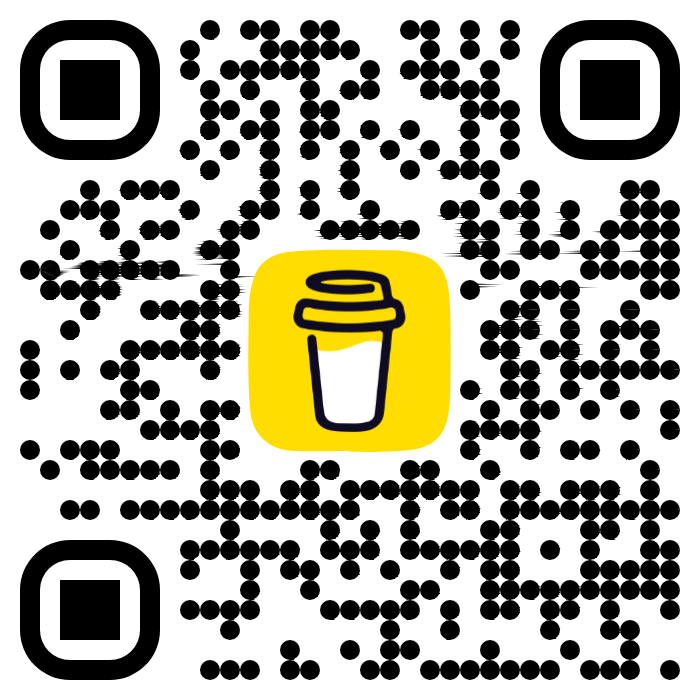